## Student Performance Indicator

# Life Cycle of Machine Learning Project

    - Understanding the problem statement
    - Data collection
    - Data checks to perform
    - Exploratory data analysis
    - Data pre-processing
    - Model training
    - Choose best model


# 1) Problem Statement

- This project aims to understand how a student's performance (test scores) is affected by various factors such as:
  - Gender  
  - Ethnicity  
  - Parental level of education  
  - Lunch  
  - Test preparation course  

---

# 2) Data Collection  

- **Dataset Source:** [Kaggle - Student Performance Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)  
- The dataset consists of **8 columns** and **1000 rows**.  

---

## 2.1 Import Data and Required Packages  

To begin, we need to import the necessary libraries:  

```python
import pandas as pd  # For data manipulation  
import numpy as np  # For numerical computations  
import matplotlib.pyplot as plt  # For data visualization  
import seaborn as sns  # For statistical data visualization  
import warnings  

# Suppress warnings for clean output  
warnings.filterwarnings('ignore')


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv('data/stud.csv')

In [104]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [105]:
df.shape

(1000, 8)

In [106]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [108]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [109]:
# checking number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [110]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [111]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [112]:
print("Categories in 'gender' variable :    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :    ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :    ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :    ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :     ['female' 'male']
Categories in 'race_ethnicity' variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :     ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :     ['none' 'completed']


In [113]:
# Define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# print the features
print('We have {} numerical features {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding column for total score and Average Score

In [114]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [115]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [116]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')


Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [117]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')


Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


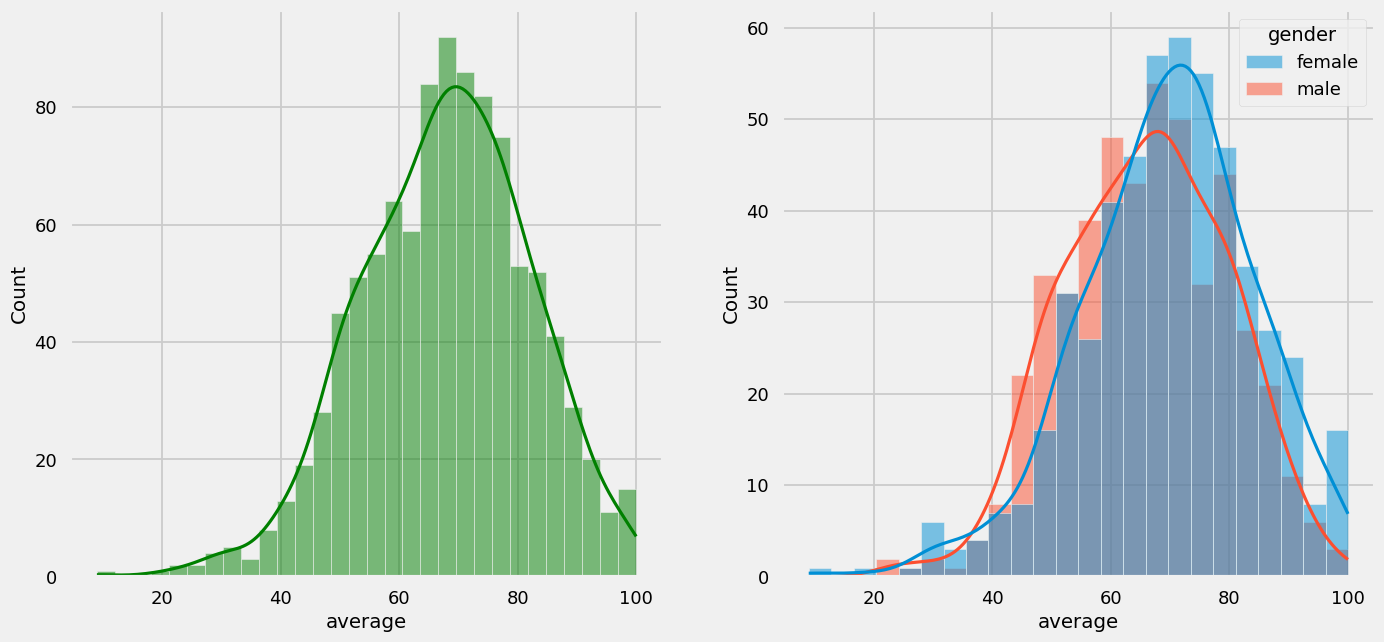

In [118]:
fig, axs = plt.subplots(1 ,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

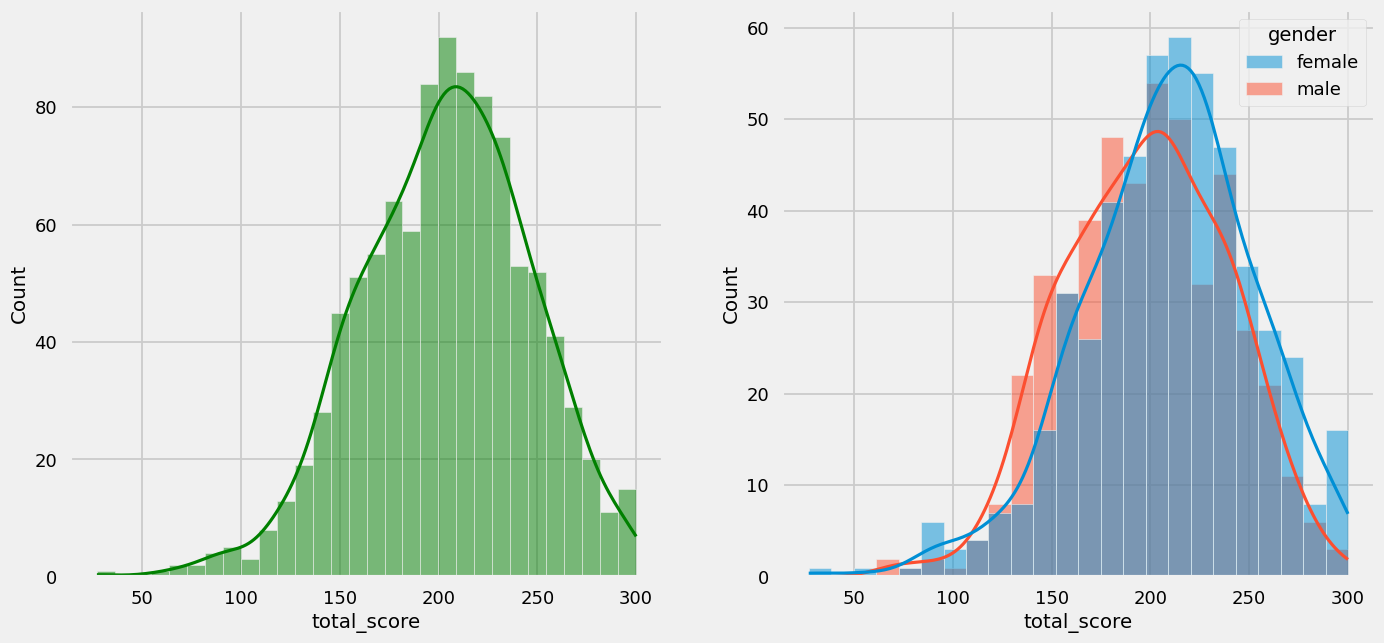

In [119]:
fig, axs = plt.subplots(1 ,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

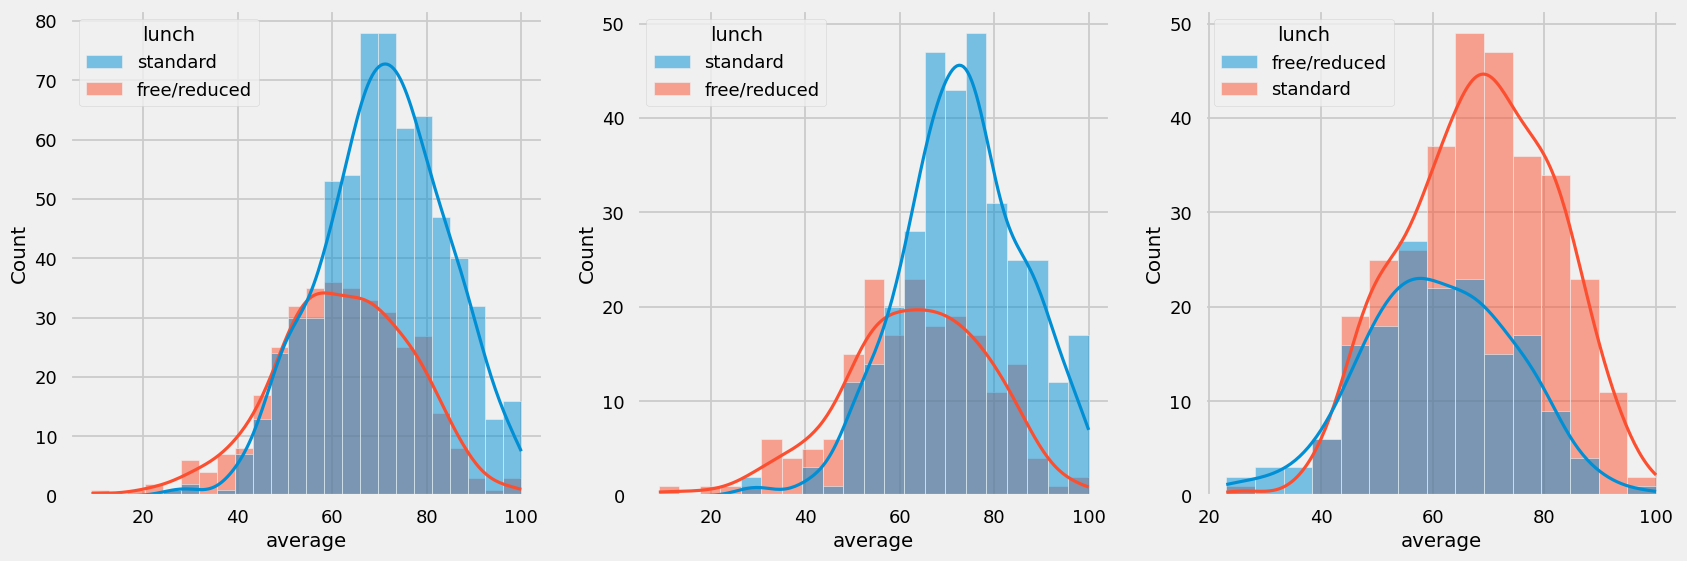

In [120]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

plt.show()

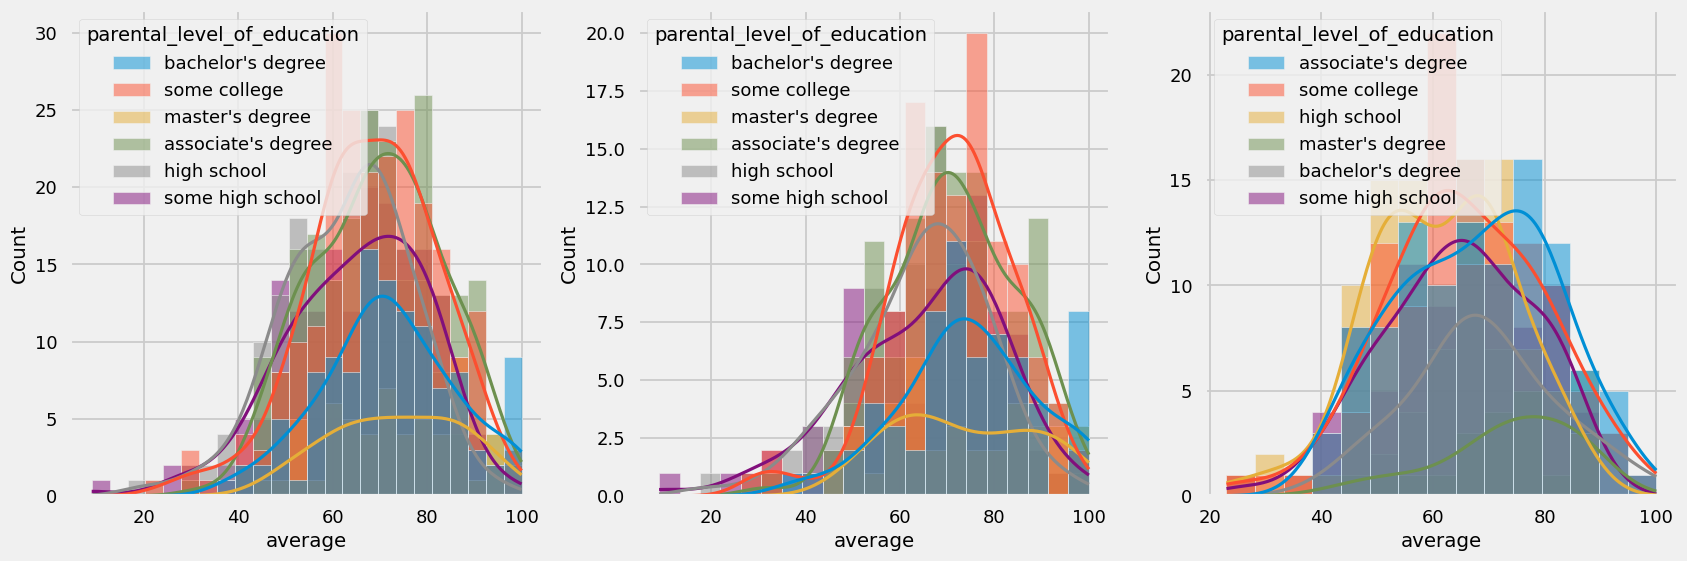

In [121]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')

plt.show()

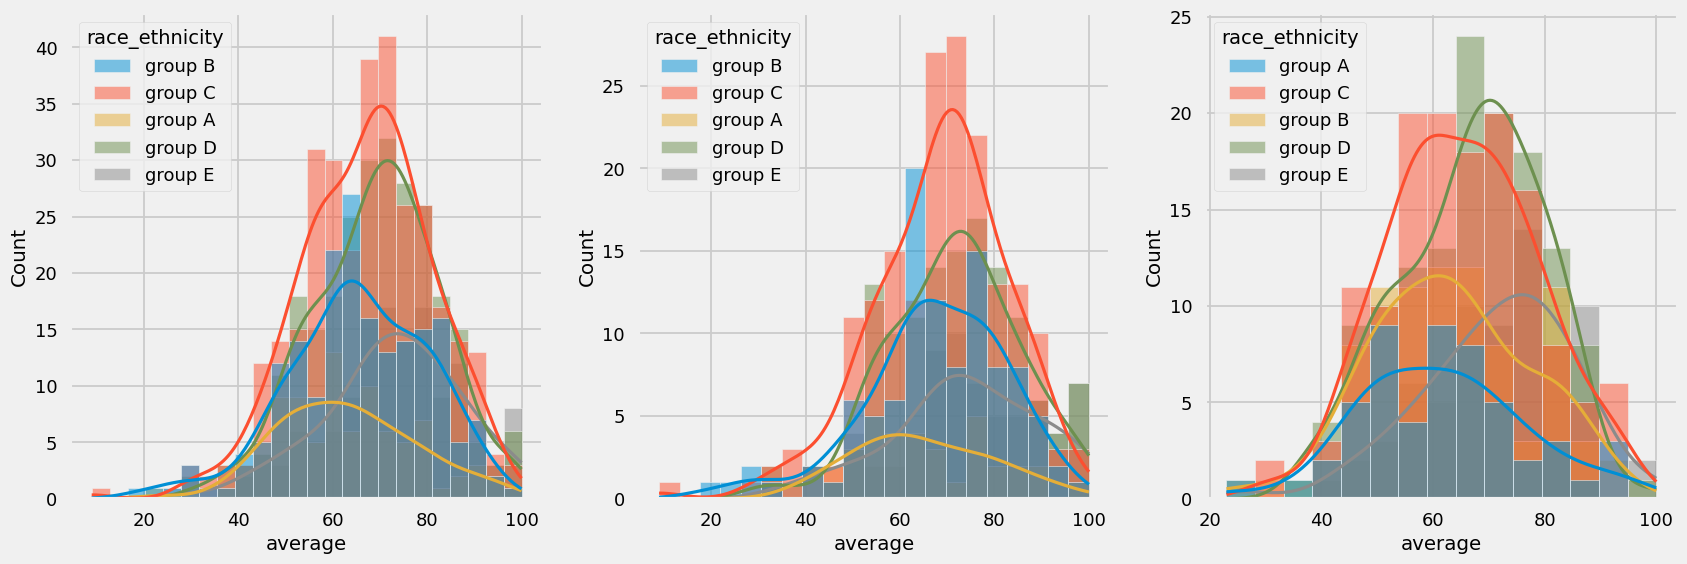

In [122]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')

plt.show()

## Maximum score of students in all three subjects

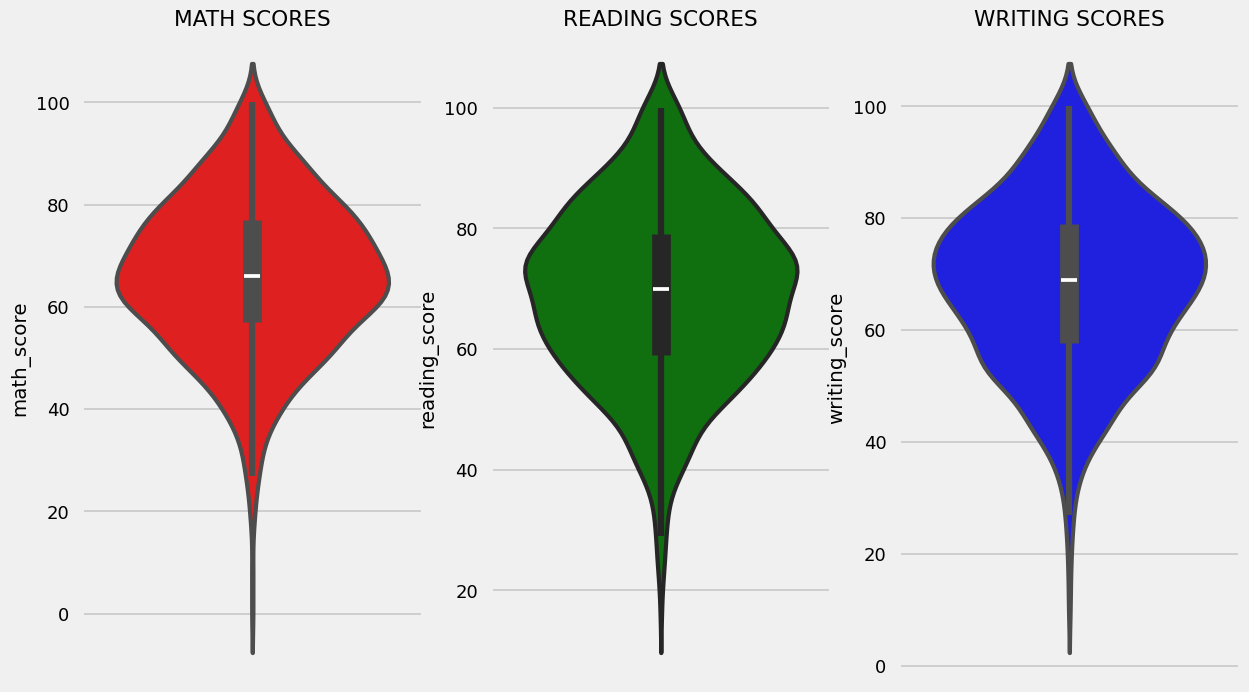

In [123]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()

## Multivariate analysis using pieplot

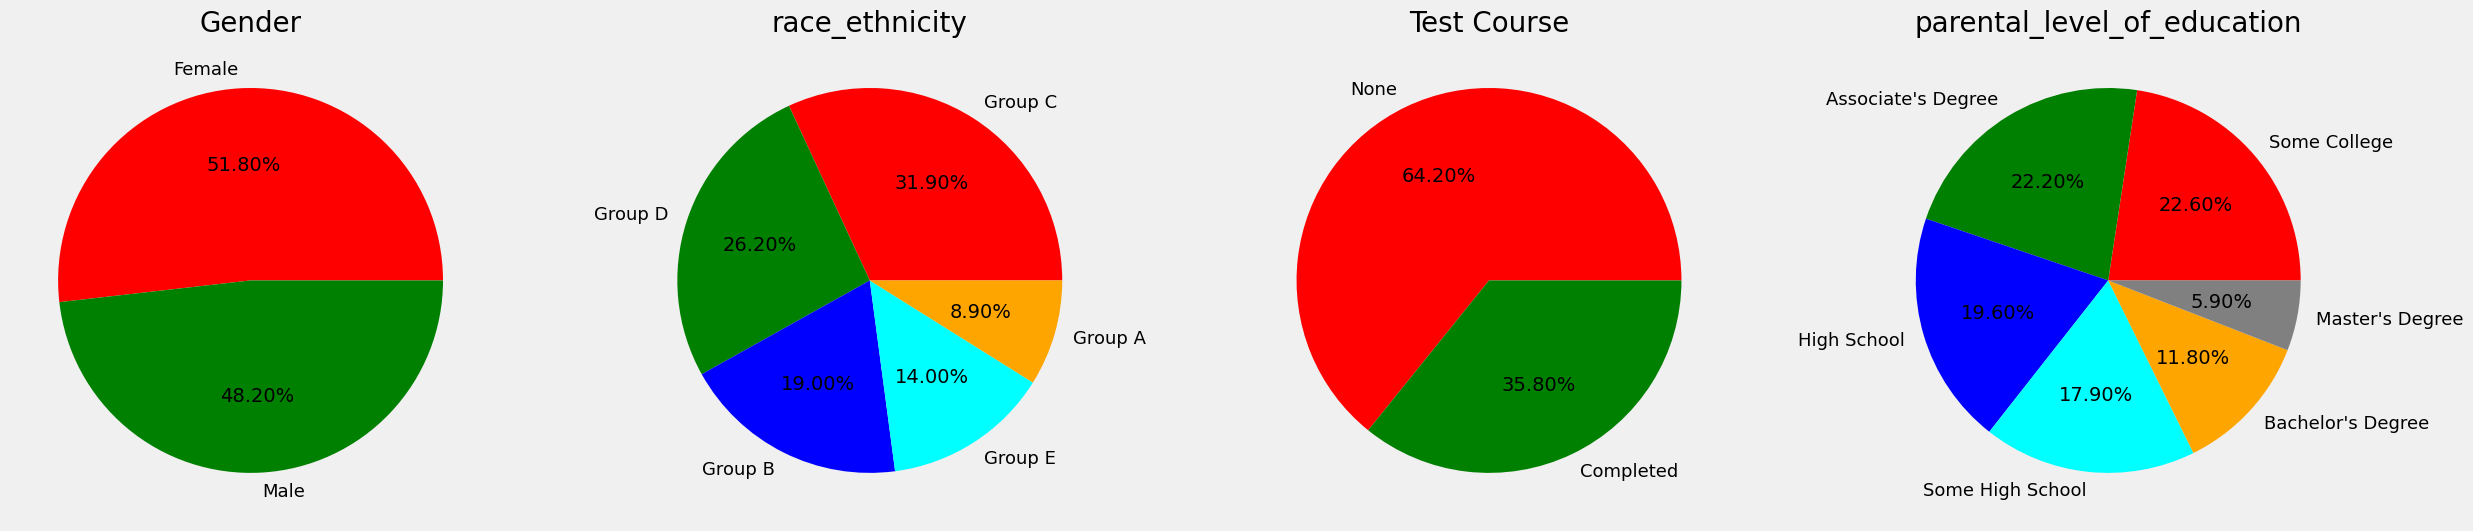

In [124]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('parental_level_of_education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

## UNIVARIATE ANALYSIS (How is distribution of Gender ?)

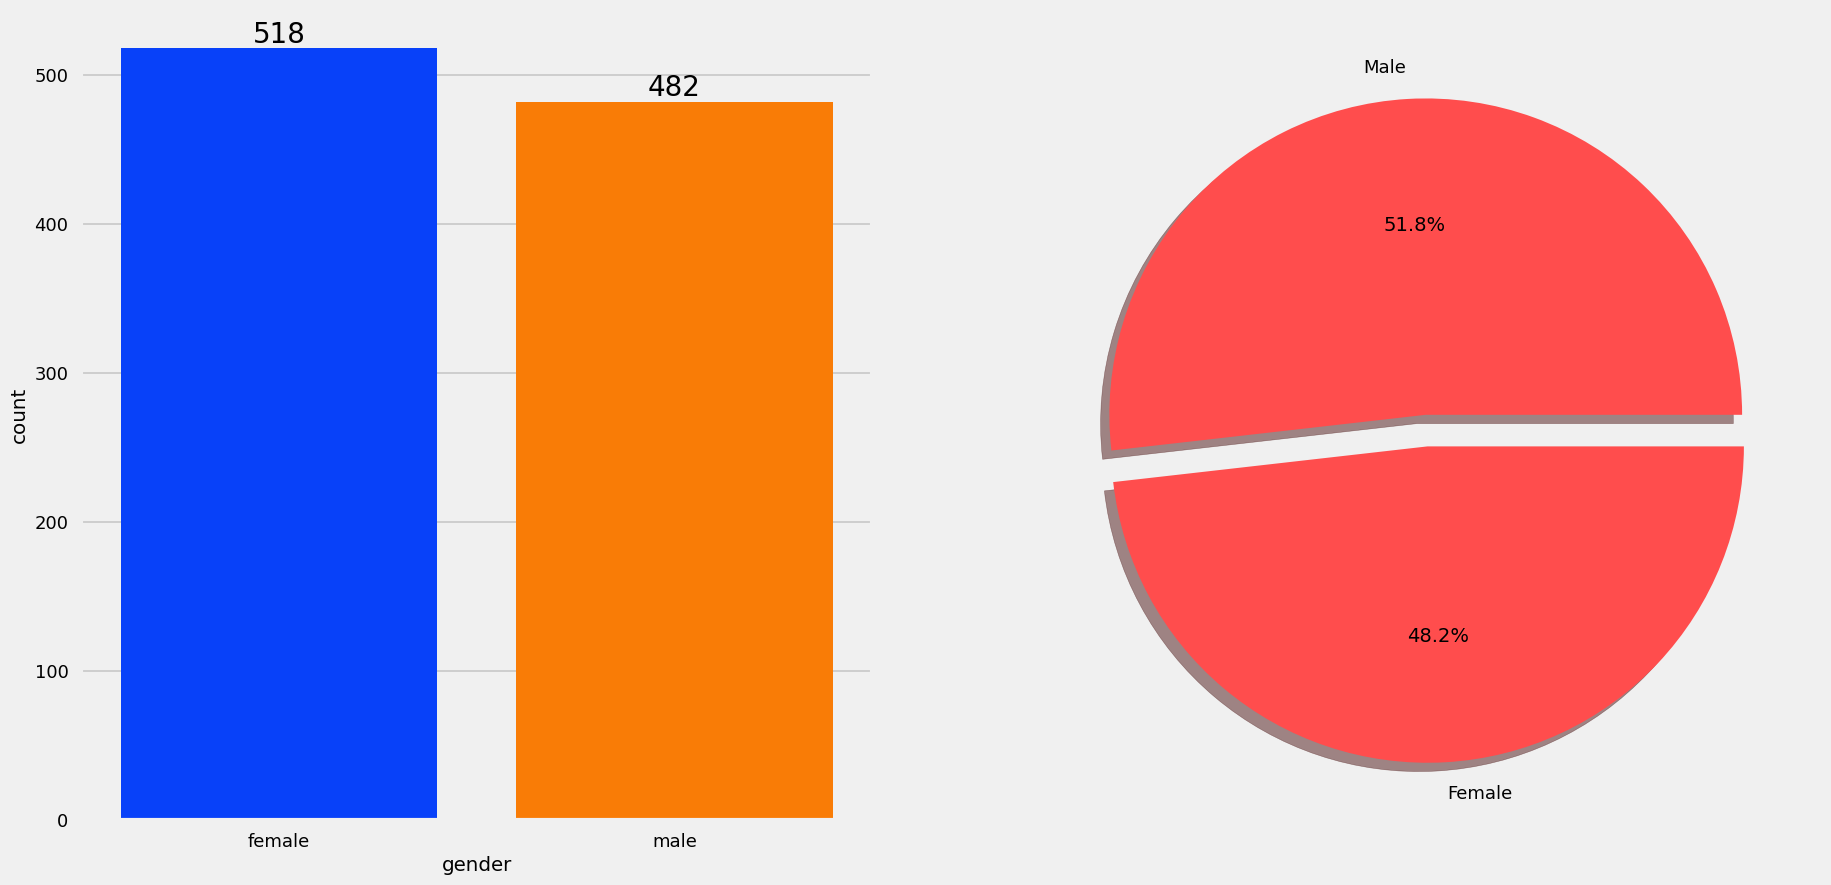

In [125]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d'])

plt.show()

## BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [126]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


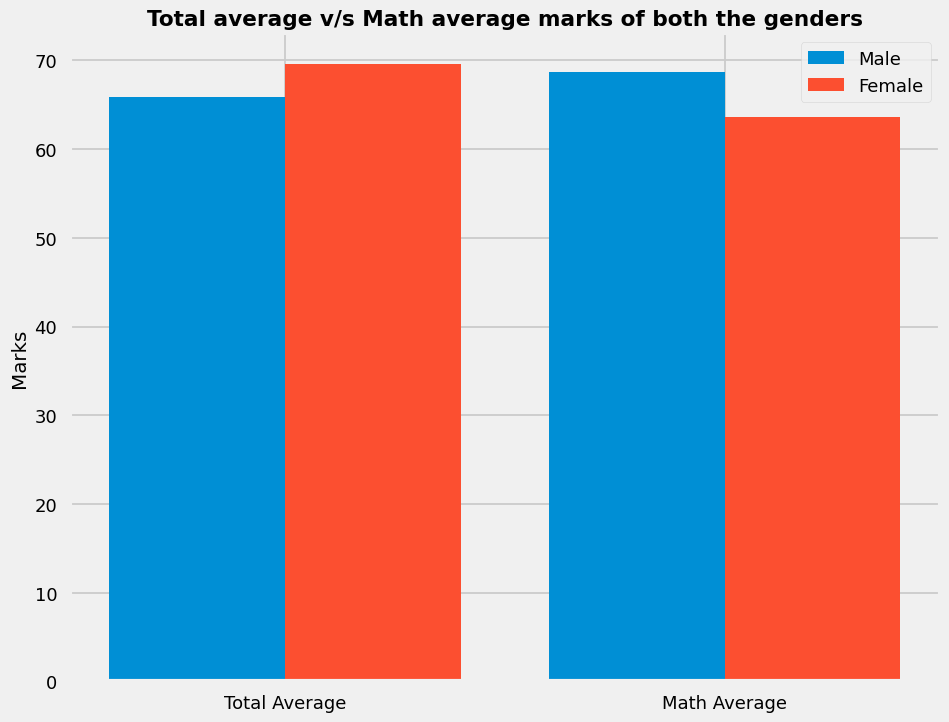

In [127]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## UNIVARIATE ANALYSIS (How is Group wis distribution?)

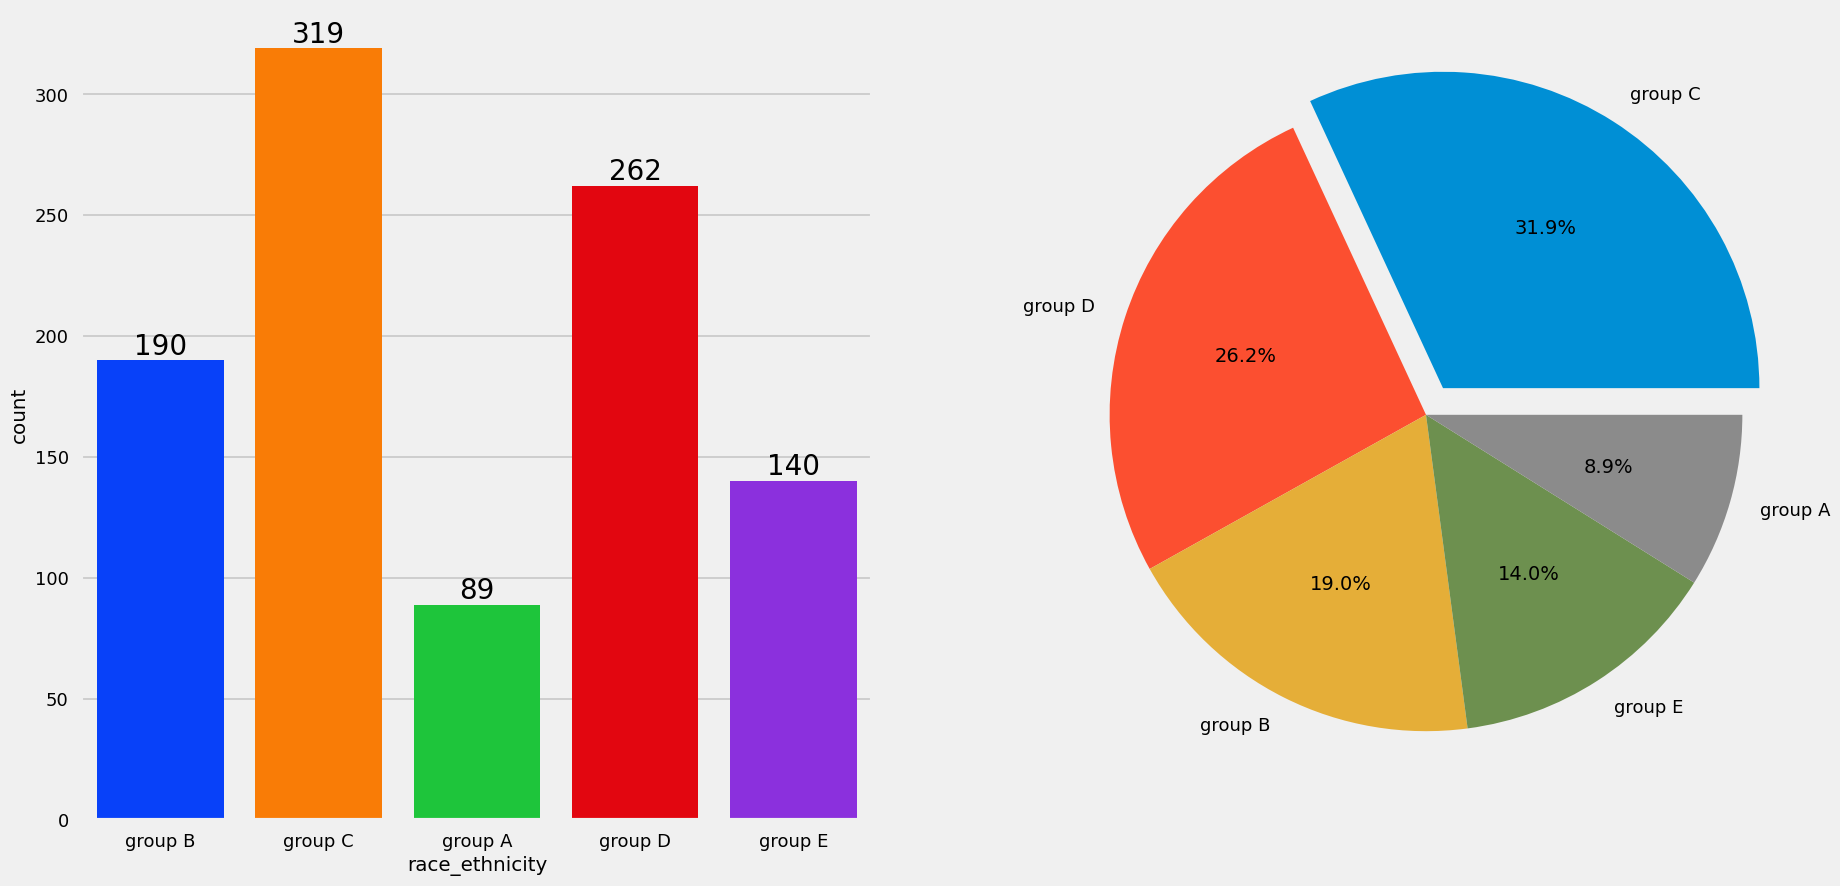

In [128]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(
    x=df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%'
)

plt.show()

## BIVARIATE ANALYSIS (Is Race_Ethnicity has any impact on student's performance?)

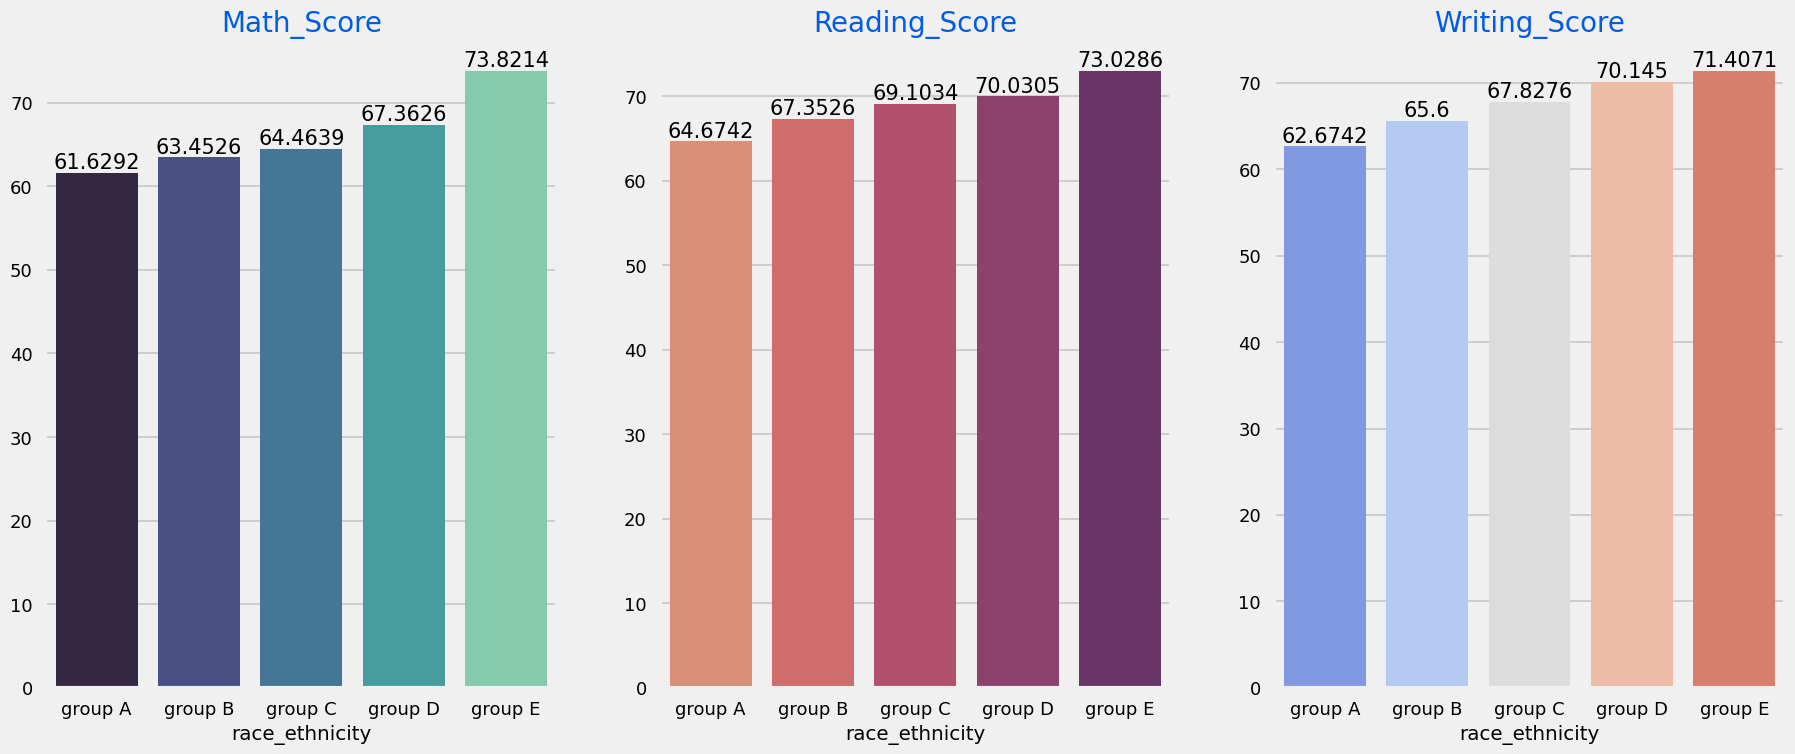

In [129]:
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math_Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading_Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing_Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()

## UNIVARIATE ANALYSIS(What is educational background of student's parent?)

Text(0, 0.5, 'Count')

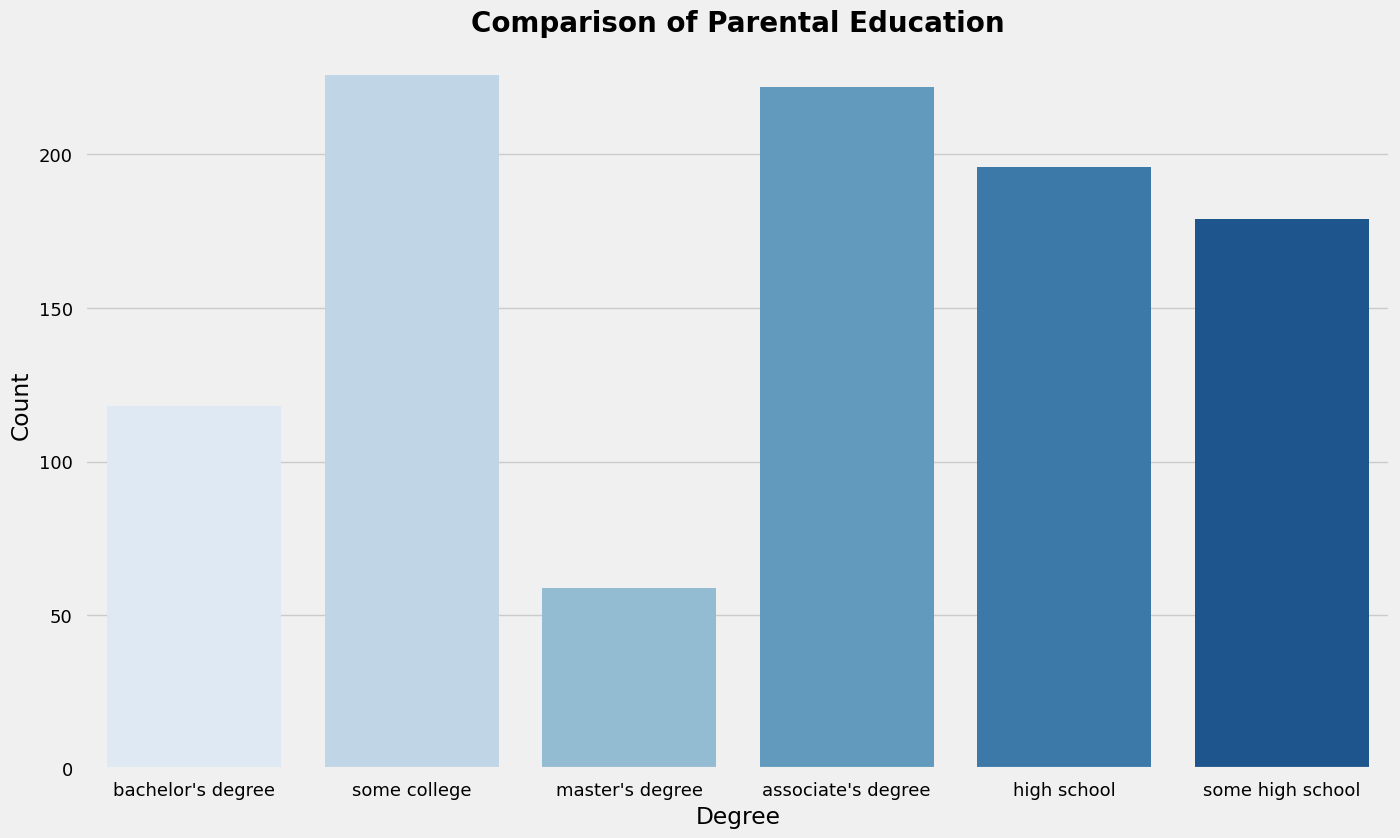

In [130]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df['parental_level_of_education'], palette='Blues')

plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

## BIVARIATE ANALYSIS(Is parental education has any impact on student's performance?)

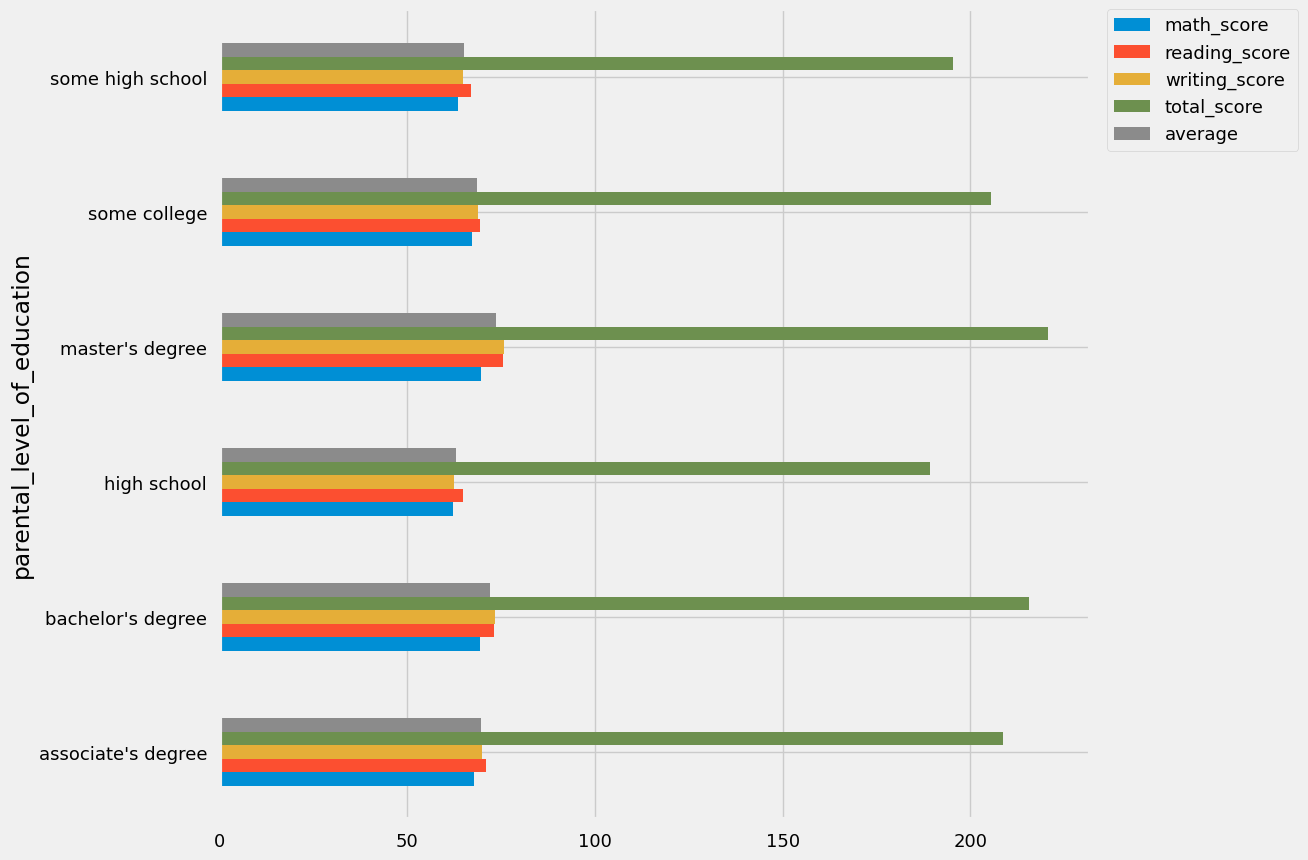

In [131]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()


## UNIVARIATE ANALYSIS (Which type of lunch is most common among students?)

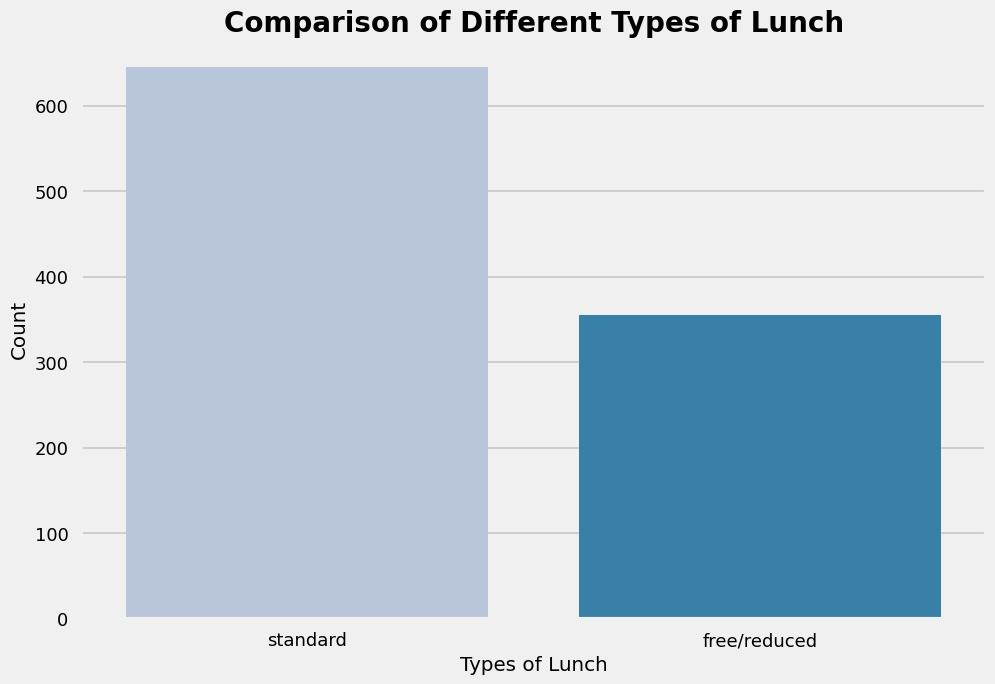

In [132]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(x=df['lunch'], palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()

## BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance?)

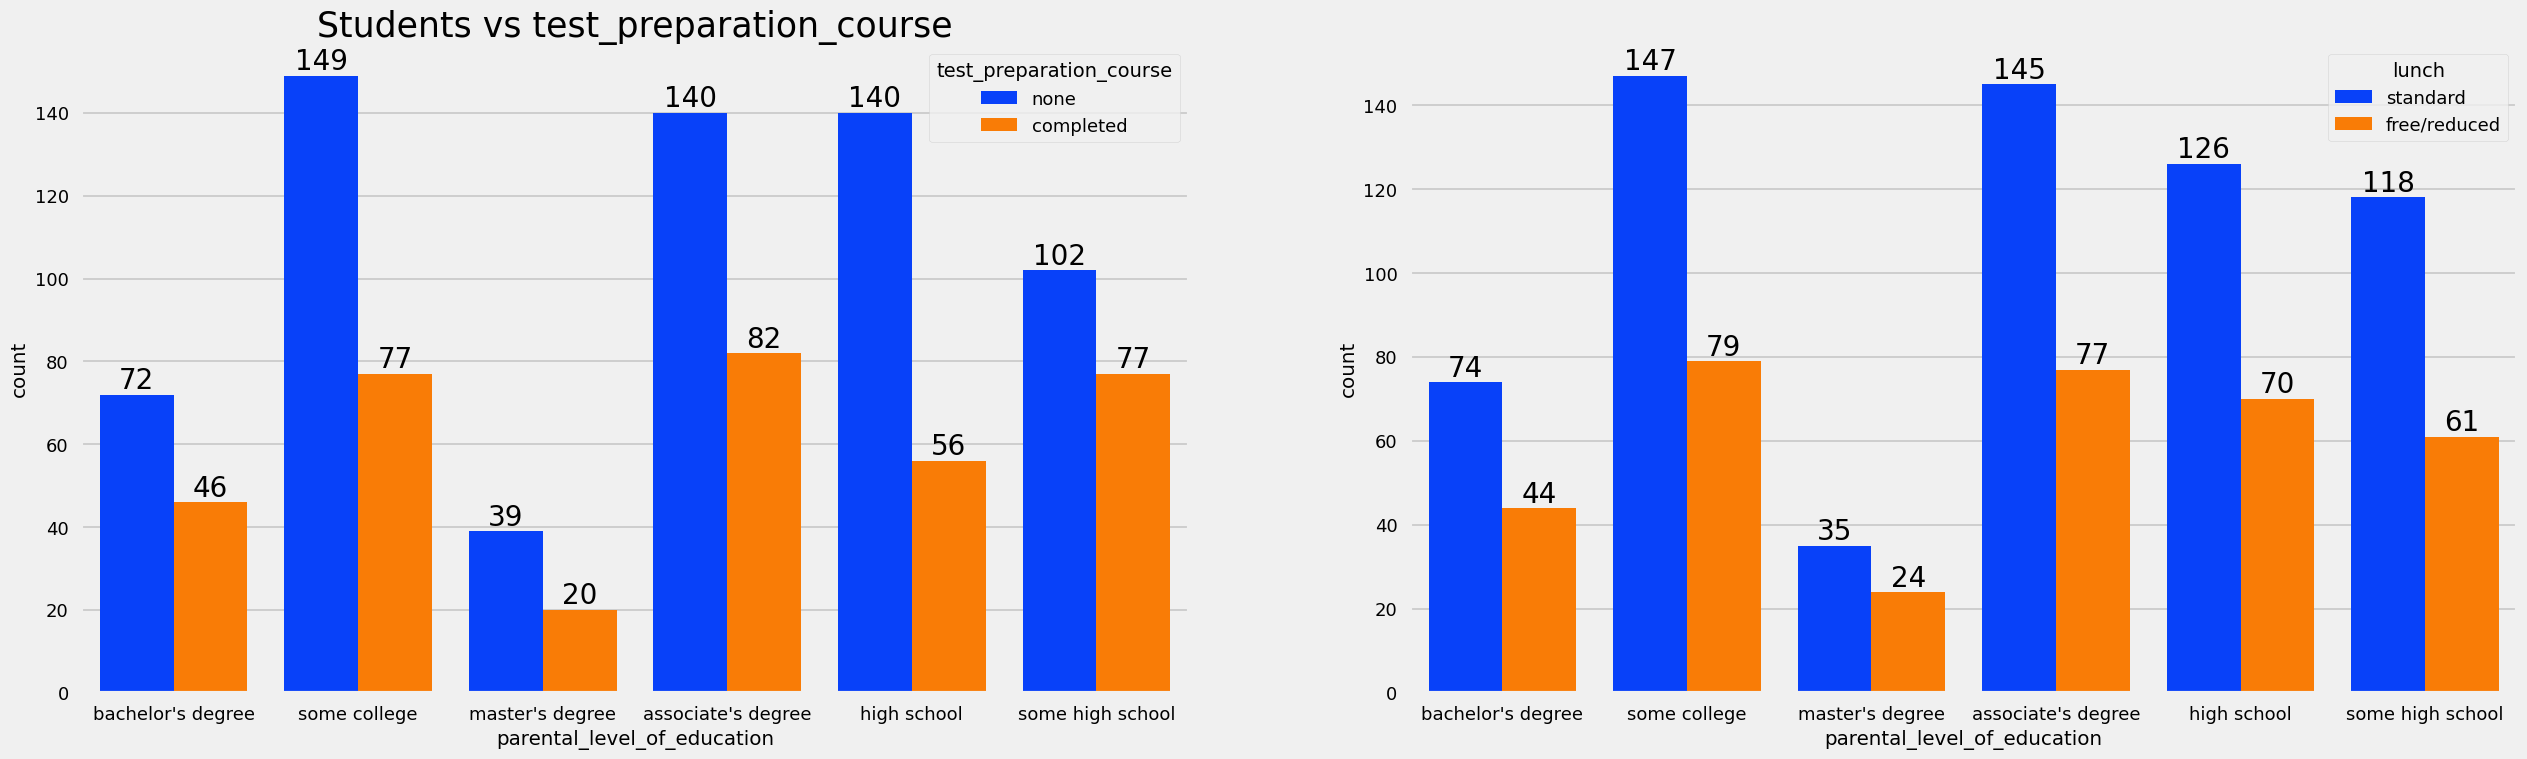

In [133]:
f, ax = plt.subplots(1, 2, figsize=(28, 8))

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test_preparation_course', color='black', size=25)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

## BIVARIATE ANALYSIS (Is Test Preparation course has any impact on the students' performance ?)

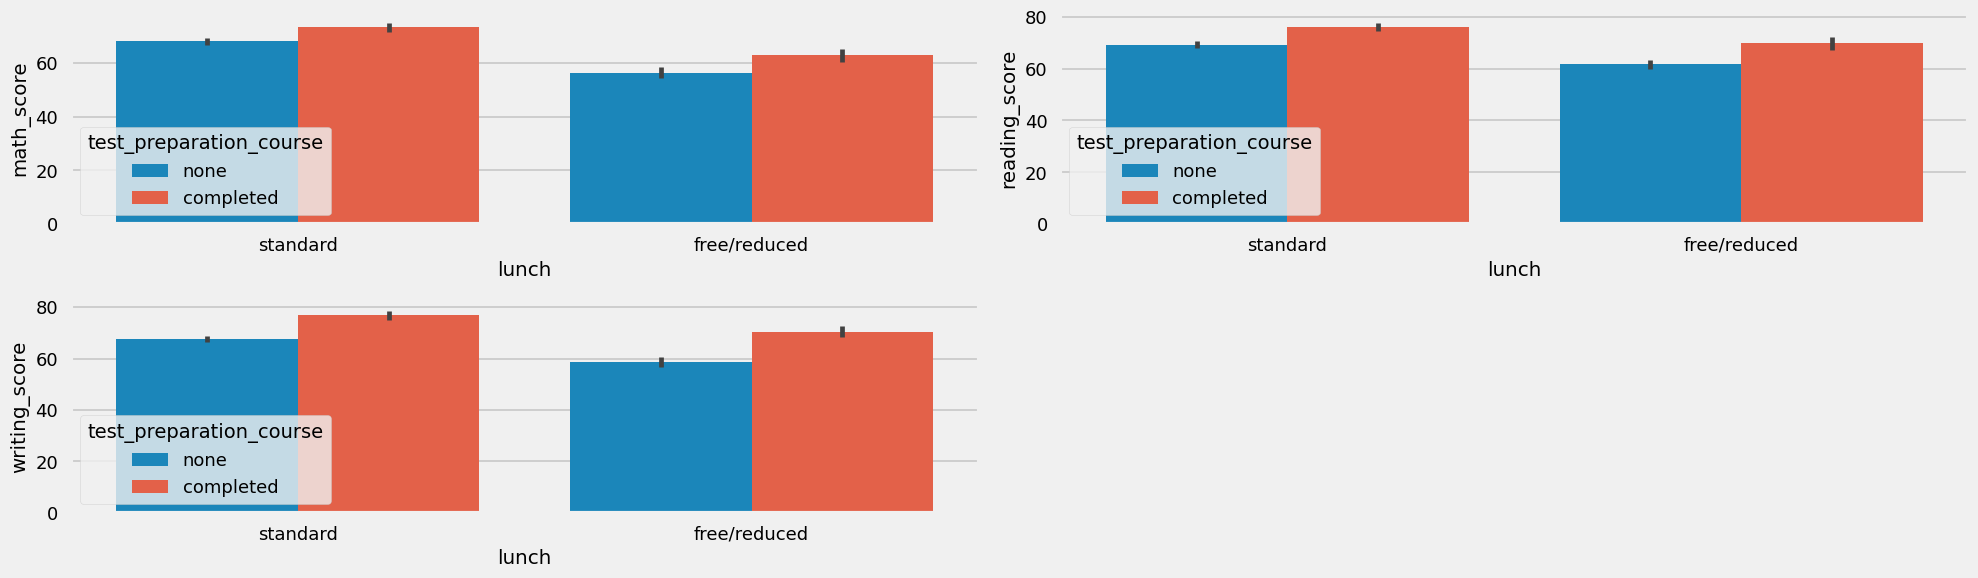

In [134]:
plt.figure(figsize=(20, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

plt.tight_layout()
plt.show()

In [135]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## CHECKING OUTLIERS

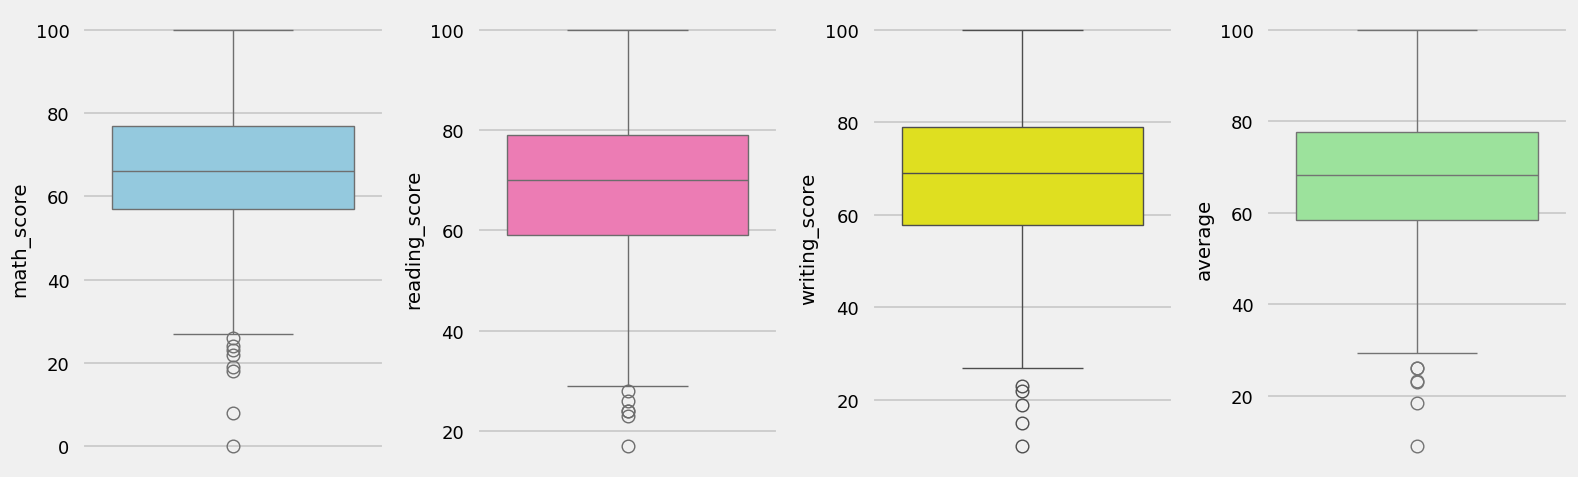

In [136]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=df['math_score'], color='skyblue')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['reading_score'], color='hotpink')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['writing_score'], color='yellow')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['average'], color='lightgreen')

plt.tight_layout()
plt.show()

## MULTIVARIATE ANALYSIS USING PAIRPLOT

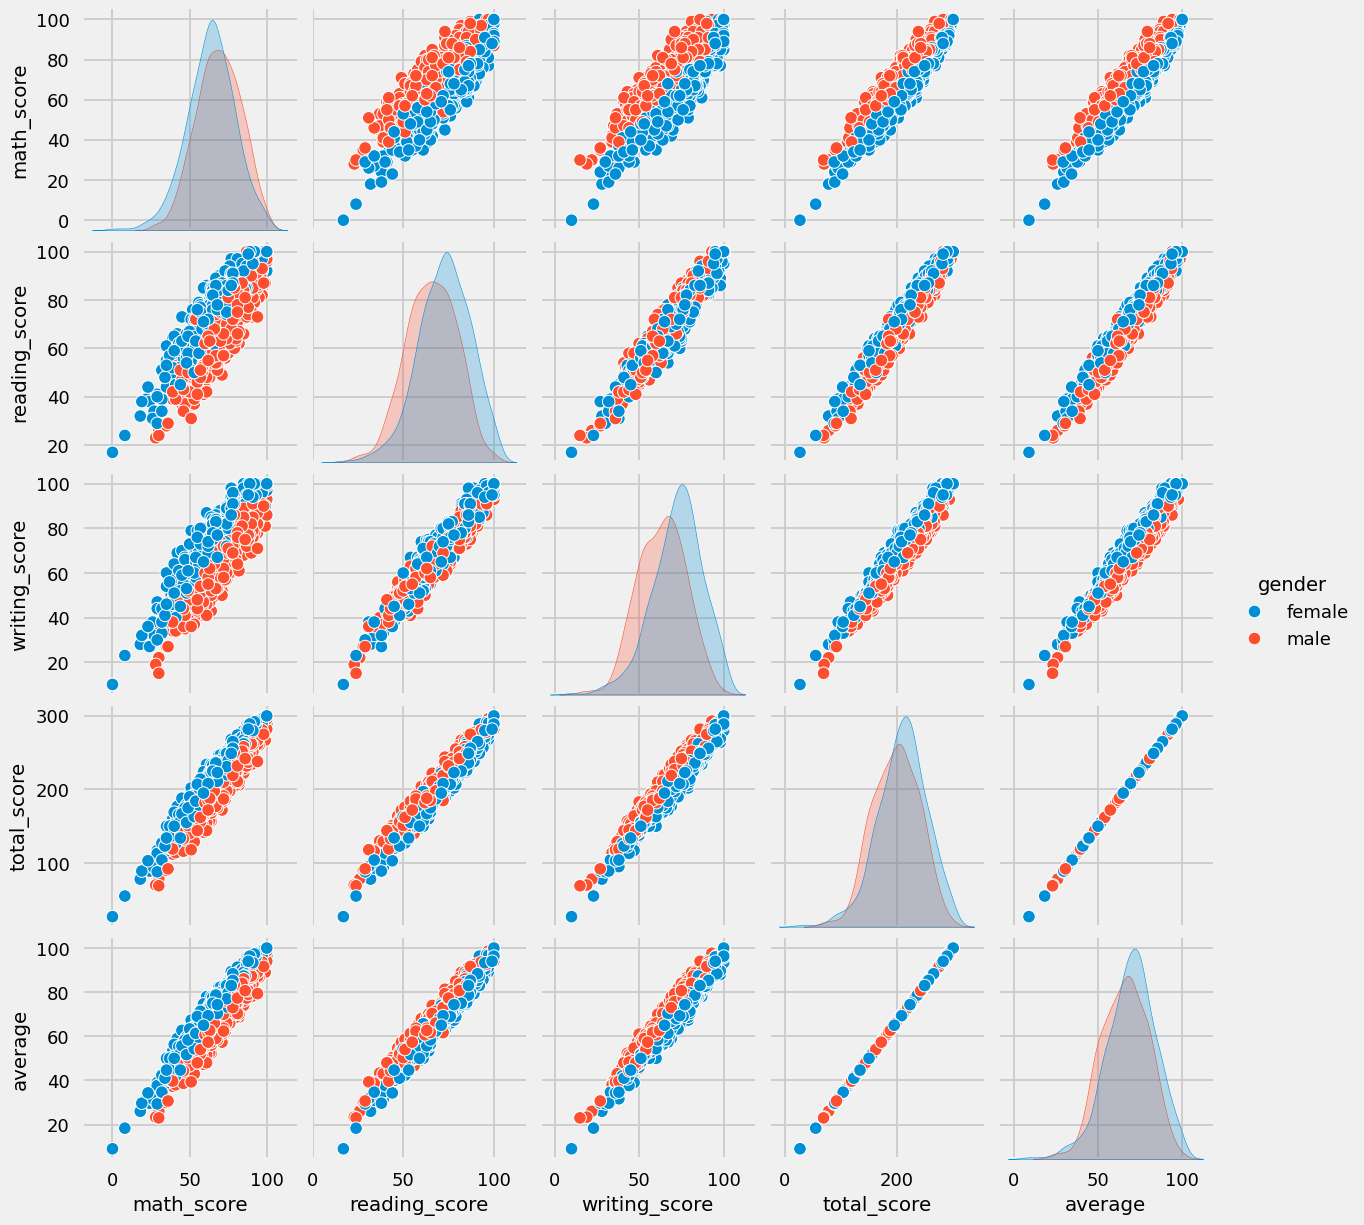

In [137]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Conclusions

- Student performance is related to **lunch type, race_ethnicity, and parental level of education**.  
- **Females** lead in pass percentage and are also the **top scorers**.  
- Student performance is **not strongly related** to the test preparation course.  
- **Completing the preparation course is beneficial**.  
